# Spotify Recommendations Playlists Network Analysis

### Authors: [Brenda Alexandra de Souza Silva](https://github.com/breudes) and [Paulo Vanzolini Moura da Silva](https://github.com/paulovanzo)

# About this project

This project consists of a case study, focused on a co occurrence network analysis, with a dataset of one thousand playlists of the music streaming service Spotify. Further, it is possible to see that this dataset was used to make a direct network to analyze some global metrics and also use Gephi for plotting this network.

The analysis it’s mainly focused on hubs and global metrics, based on distance and connectivity, topics studied on this class, and these metrics are: Eccentricity, Diameter, Periphery, Radius, Center and Degree, Closeness, Betweenness and Eigenvector Centrality.

# Downloads and imports

**Download of Dataset**

This dataset contain one thousand playlists of the music streaming called spotify. Also, this dataset is from a project where an artificial intelligence is trained to generate song recommendations, see more about this project [here](https://github.com/vaslnk/Spotify-Song-Recommendation-ML). 

In [ ]:
!curl https://raw.githubusercontent.com/vaslnk/Spotify-Song-Recommendation-ML/master/data/mpd.slice.0-999.json -o playlists.json


Installation of Nxviz, Matplotlib, Scipy and Pandas

In [ ]:
!pip install nxviz==0.6.3
!pip install matplotlib==3.1.3
!python -m pip install scipy
!pip install pandas --upgrade

Inserting required libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import nxviz as nv
import pandas as pd
import numpy as np
import json
from scipy.stats import norm
import seaborn as sns

Converting .json file data to DataFrame (via Pandas)

In [ ]:
raw_data = json.load(open('playlists.json')) 
raw_playlists = pd.DataFrame(raw_data["playlists"])

# Base graph 

It is important to mention that this project is based of **a problem of co-occurrence, in a perspective of a music songs playlist**. In this case, that was three options to work on: name of artist, name of music and name of album. 

We choose to work with **name of artist**, along with the artist ID (on spotify) and the playlist name, the last to get a sense of where this artist mention came from.

Actually, this project reference to this [challenge for music recommendation research](https://www.aicrowd.com/challenges/spotify-million-playlist-dataset-challenge) (also with a Spotify dataset)

The graph was built picking up the artist of a track and linking to the next track in the playlist, thus making a Directed Graph.

In [ ]:
# create graph
G = nx.DiGraph()

# create dict with names of all playlists
playlists_name = raw_playlists['name']

playlists_quantity = len(playlists_name)

# create dict with songs from all playlists
playlists_songs = raw_playlists['tracks']

# create Artist class to compose an object with the artist's name
class Artist:
  def __init__(self, name, uri, playlist):
    self.name = name
    self.uri = uri
    self.playlist = playlist

songs_artist = []

# data treatment with $ characters
for index in range(playlists_quantity):
  for song in playlists_songs[index]:
    if ( song['artist_name'] == 'Joey Bada$$'): 
      song['artist_name'] = 'Joey BadaSS'

# add nodes on graph 
for index in range(playlists_quantity):
  for song in playlists_songs[index]:
    songs_artist.append(song["artist_name"])
    artist_name_equal = False
    for i in range(len(songs_artist)):
       if songs_artist[i] == song["artist_name"]:
         artist_name_equal = True
    if not artist_name_equal:
      artist = Artist(song['artist_name'],song['artist_uri'],playlists_name[index])
      G.add_node(
          # node
          artist,
          # attr
          name = artist.name,
          playlist = artist.playlist, # nome da playlist associada ao artista
          uri = artist.uri # uri é tipo a URL/URI do artista no spotify
      )

# add weighted edges on graph
weights = {}

for i in range(len(songs_artist)-1):
  if len(G.edges(songs_artist[i])) > 0:
    found_edge = False
    for first_node, second_node in list(G.edges(songs_artist[i])):
      if songs_artist[i] and second_node == songs_artist[i+1]:
        found_edge = True
    if not found_edge:
      G.add_edge(songs_artist[i], songs_artist[i+1], weight=1)
      weights.update({songs_artist[i]:1})
    else:
      G.add_edge(songs_artist[i], songs_artist[i+1], weight=weights[songs_artist[i]]+1)
      weights.update({songs_artist[i]:weights[songs_artist[i]]+1})
  else:
    G.add_edge(songs_artist[i], songs_artist[i+1], weight=1)
    weights.update({songs_artist[i]:1})

# print edges quantity
print(len(nx.get_edge_attributes(G,"weight")))
# save file with graph
nx.write_graphml(G, 'playlists_by_artist-weight.graphml')
# print graph
print(G)

48088
DiGraph with 9722 nodes and 48088 edges


Load graph for futher usage

In [ ]:
# get graph
G = nx.read_graphml("playlists_by_artist-weight.graphml")

# Part One : Global Metrics 



This first part has metrics based on distance and connectivity. These metrics are: Eccentricity, Diameter, Periphery, Radius and Center. The second part, has these metrics: Degree, Closeness, Betweenness and Eigenvector Centrality. All of this metrics could be called as global metrics. 

First part has a graph and some important values to this analysis. Second part was break in two sections: top 10 edges of resulted graph and the figure of graph. 

**Eccentricity**

It is the maximum distance from a node to all other node in the network.


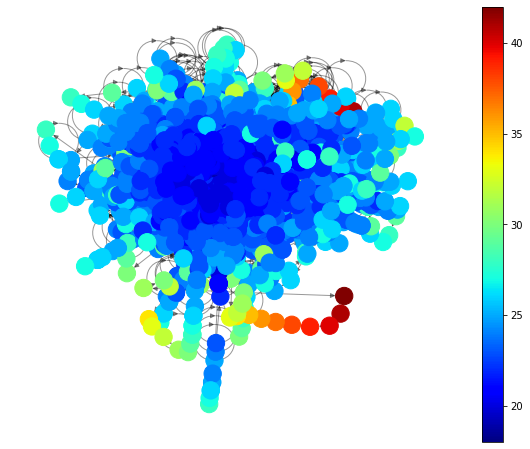

In [ ]:
# set figure
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G)

# color of nodes based on eccentricity
color = list(dict(nx.eccentricity(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,ax=ax)

# plot figure
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eccentricity.png', transparent=True,dpi=300)
plt.show()

**Diameter**

The diameter of a network is the maximum eccentricity.

In [34]:
print("Diameter of network (g): {}".format(nx.diameter(G)))

Diameter of network (g): 42


**Periphery**

The periphery of a network is a set of all nodes whose eccentricity equals the 
diameter.

In [ ]:
nx.periphery(G)

['Mother Mabel Carter']

**Radius**

The radius of a network is the minimum eccentricity.

In [ ]:
print("Radius of network(g): {}".format(nx.radius(G)))

Radius of network(g): 18


**Center**

The center of a network is a set of all nodes whose eccentricity equal the radius.


In [ ]:
nx.center(G)

['The Smashing Pumpkins',
 'Florence + The Machine',
 'Alan Jackson',
 'Merle Haggard & The Strangers',
 'Ellie Goulding',
 'New Order',
 'The Smiths',
 'Depeche Mode',
 'Ella Henderson',
 'Mac Demarco',
 'Eric Church',
 'The Cardigans',
 'Bon Iver',
 'George Strait',
 'Yonder Mountain String Band']

### Degree Centrality

Assigns an degree based simply on the number of connections held by each node of the network.

Top 10 Edges of Degree Centrality

In [31]:
menor = {}
top10 = []

degree = dict(nx.degree_centrality(G))

for key, value in degree.items():
  if len(top10) == 0:
    menor = {key:value}
    top10.append({key: value})
  if round(value,6) > round(list(menor.values())[0],6):
    if len(top10) == 10:
      for i in range(len(top10)):
        if list(top10[i].values())[0] == list(menor.values())[0]:
          top10[i] = {key: value}
    else:
      top10.append({key: value})
  
  for i in range(len(top10)-1):
    if round(list(top10[i].values())[0],6) < round(list(top10[i+1].values())[0],6):
      menor = top10[i]

# print top 10
for node in top10:
  print(node)

{'Missy Elliott': 0.0058635942804238245}
{'Britney Spears': 0.010801357884991257}
{'Beyoncé': 0.02684908959983541}
{'Justin Timberlake': 0.015430511264273224}
{'Usher': 0.021602715769982513}
{'Kanye West': 0.03579878613311388}
{'Drake': 0.05997325378047526}
{'Rihanna': 0.04320543153996503}
{'Ed Sheeran': 0.031889723279497996}
{'Calvin Harris': 0.0266433494496451}


Figure of Degree Centrality

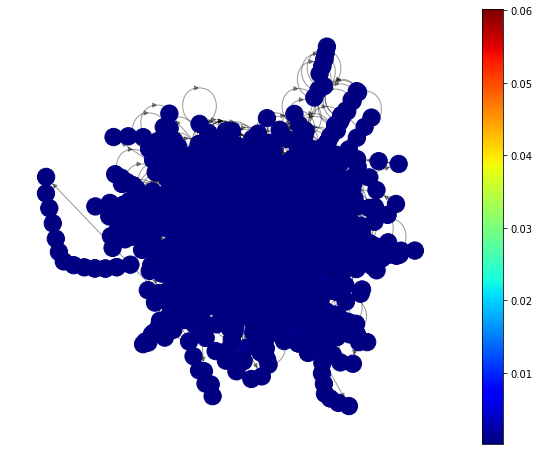

In [ ]:
# the degree centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G)

# color of nodes
color = list(dict(nx.degree_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# pĺot result figure
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('degree_centrality.png', transparent=True,dpi=300)
plt.show()

### Closeness Centrality

Average distance farness (inverse distance) from a node to all other vertices. 

In [32]:
# closeness centrality values
closeness = dict(nx.closeness_centrality(G))

Top 10 edges of Closeness Centrality

In [33]:
menor_top10 = {}
top10 = []

for key, value in closeness.items():
  if len(top10) == 0:
    menor_top10 = {key:value}
    top10.append({key: value})
  if round(value,6) > round(list(menor_top10.values())[0],6):
    if len(top10) >= 10:
      for i in range(len(top10)):
        if list(top10[i].keys())[0] == list(menor_top10.keys())[0]:
          top10[i] = {key: value}
          
    else:
      top10.append({key: value})
  
  for i in range(len(top10)-1):
    if round(list(top10[i].values())[0],6) < round(list(top10[i+1].values())[0],6):
      menor_top10 = top10[i]

# print top 10
for node in top10:
  print(node)

{'Missy Elliott': 0.24033326740506328}
{'Britney Spears': 0.25257223030554976}
{'Beyoncé': 0.2794113420137392}
{'Justin Timberlake': 0.2669357717549496}
{'Shaggy': 0.255761944853715}
{'The Chainsmokers': 0.2829161816065192}
{'Drake': 0.29072584262942247}
{'Rihanna': 0.2832541740726711}
{'Justin Bieber': 0.2776318044210887}
{'Jason Derulo': 0.26858784847898765}


Figure of Centrality Closeness

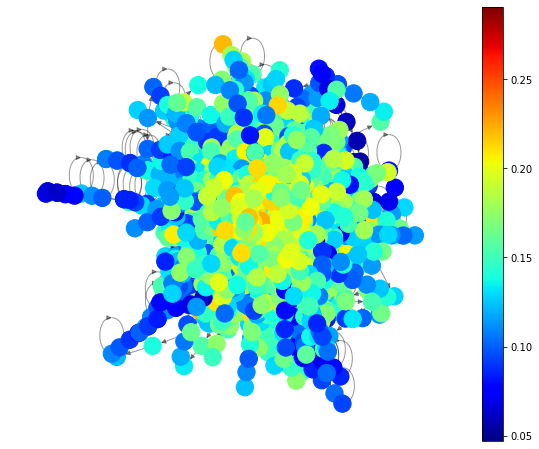

In [ ]:
# the closeness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G)

# color of nodes
color = list(dict(closeness).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# plot figure
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('closeness_centrality.png', transparent=True,dpi=600)
plt.show()

### Betweenness Centrality

Position on the shortest path. This path is, in general, a bridge of some useful information on a graph.

Top 10 edges of Betweenness Centrality

In [ ]:
betweenness = dict(nx.betweenness_centrality(G))

In [ ]:
menor_top10 = {}
top10 = []

for key, value in betweenness.items():
  if len(top10) == 0:
    menor_top10 = {key:value}
    top10.append({key: value})
  if round(value,6) - round(list(menor_top10.values())[0],6) > 0:
    if len(top10) >= 10:
      for i in range(len(top10)):
        if list(top10[i].keys())[0] == list(menor_top10.keys())[0]:
          top10[i] = {key: value}
          
    else:
      top10.append({key: value})
  
  for i in range(len(top10)-1):
    if list(top10[i].values())[0] < list(top10[i+1].values())[0]:
      menor_top10 = top10[i]

# print top 10
for node in top10:
  print(node)

{'Missy Elliott': 0.0017680424241901392}
{'Britney Spears': 0.0036522284083521273}
{'Beyoncé': 0.019001274696111133}
{'Justin Timberlake': 0.010186337574939341}
{'Shaggy': 0.007692811410287616}
{'The Chainsmokers': 0.03420632654167862}
{'Drake': 0.06621214417367138}
{'Rihanna': 0.048321340620388314}
{'Justin Bieber': 0.02310538980775225}
{'The Rolling Stones': 0.011035884300866432}


Figure of Betweenness Centrality

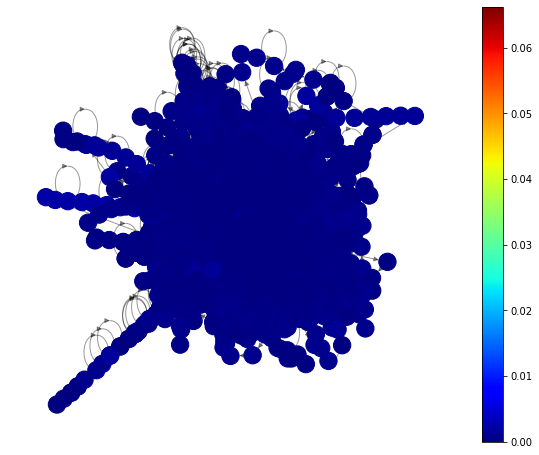

In [ ]:
# the betwenness centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G)

# color of nodes
color = list(dict(betweenness).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# plot figure
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('betweenness_centrality.png', transparent=True,dpi=600)
plt.show()

### Eigenvector Centrality

Authority score based on the score of the neighbors of a node. 


Top 10 edges of Eigenvector Centrality

In [ ]:
menor_top10 = {}
top10 = []

eigenvector = dict(nx.eigenvector_centrality(G))

for key, value in eigenvector.items():
  if len(top10) == 0:
    menor_top10 = {key:value}
    top10.append({key: value})
  if round(value,6) - round(list(menor_top10.values())[0],6) > 0:
    if len(top10) >= 10:
      for i in range(len(top10)):
        if list(top10[i].keys())[0] == list(menor_top10.keys())[0]:
          top10[i] = {key: value}
          
    else:
      top10.append({key: value})
  
  for i in range(len(top10)-1):
    if list(top10[i].values())[0] < list(top10[i+1].values())[0]:
      menor_top10 = top10[i]

# print top 10
for node in top10:
  print(node)

{'Missy Elliott': 0.02300625265824659}
{'Britney Spears': 0.041931326911178464}
{'Beyoncé': 0.12819279279902973}
{'Justin Timberlake': 0.07196958249503586}
{'Kanye West': 0.1612278379317585}
{'Drake': 0.21716338680135053}
{'Rihanna': 0.14553694939001618}
{'Chris Brown': 0.12638597103556184}
{'Jason Derulo': 0.08775568279131092}
{'Miley Cyrus': 0.07292397258875653}


Figure of Eigenvector Centrality

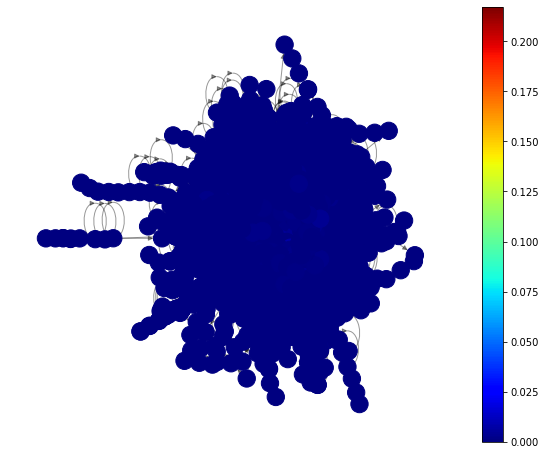

In [ ]:
# the eigenvector centrality of network(g)
fig, ax = plt.subplots(1,1,figsize=(10,8))

# layout position
pos = nx.spring_layout(G)

# color of nodes
color = list(dict(nx.eigenvector_centrality(G)).values())

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color=color,
                 cmap=plt.cm.jet,
                 ax=ax)

# plot figure
plt.axis("off")
plt.colorbar(nodes)
plt.savefig('eigenvector_centrality.png', transparent=True,dpi=600)
plt.show()

# Bivariate Analysis

This part is a bivariate analysis between metrics Degree and Closeness Centrality.

Degree is a score of all links from a node and Closeness centrality is a measure used to detect nodes that could spread information, in a very efficient way, through a graph; so this relation is useful to know which nodes (also, which region they are on graph) are used to transport some information.

Load all metrics that will be used on bivariate and multivariate analysis.

In [ ]:
betweeness_centrality = [v for k,v in nx.betweenness_centrality(G).items()]
eigenvector_centrality = [v for k,v in nx.eigenvector_centrality(G).items()]
closeness_centrality = [v for k,v in nx.closeness_centrality(G).items()]
degree_centrality = [d for n, d in nx.degree_centrality(G).items()]
degree = [d for n, d in G.degree()]
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 

Plot result graphic - Bivariate Analysis

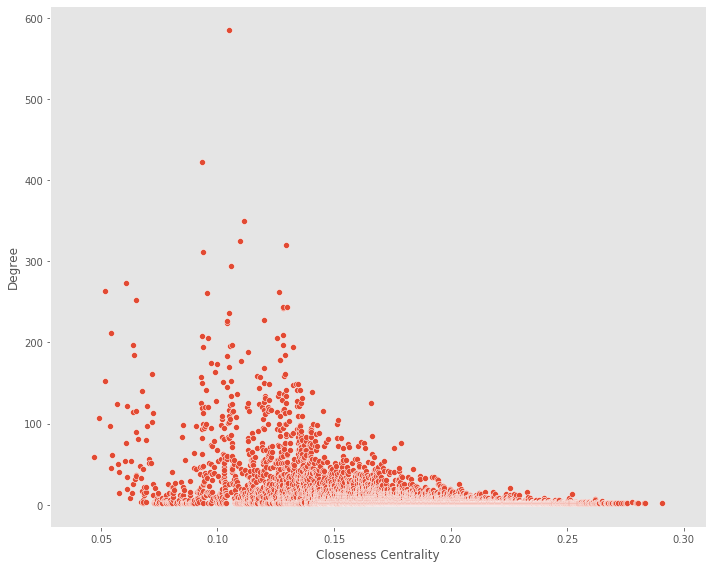

In [ ]:
plt.style.use("ggplot")

fig, ax = plt.subplots(1,1,figsize=(10,8))

sns.scatterplot(x=sorted(closeness_centrality),y=degree,ax=ax)
ax.set_xlabel("Closeness Centrality")
ax.set_ylabel("Degree")
ax.grid(False)

plt.tight_layout()
plt.savefig('degree_vs_closeness_centrality.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Multivariate Analysis

This part is a multivariate analysis between metrics that are based on centrality. Therefore, Degree, Closeness, Betweenness and Eigenvector Centrality metrics were used.

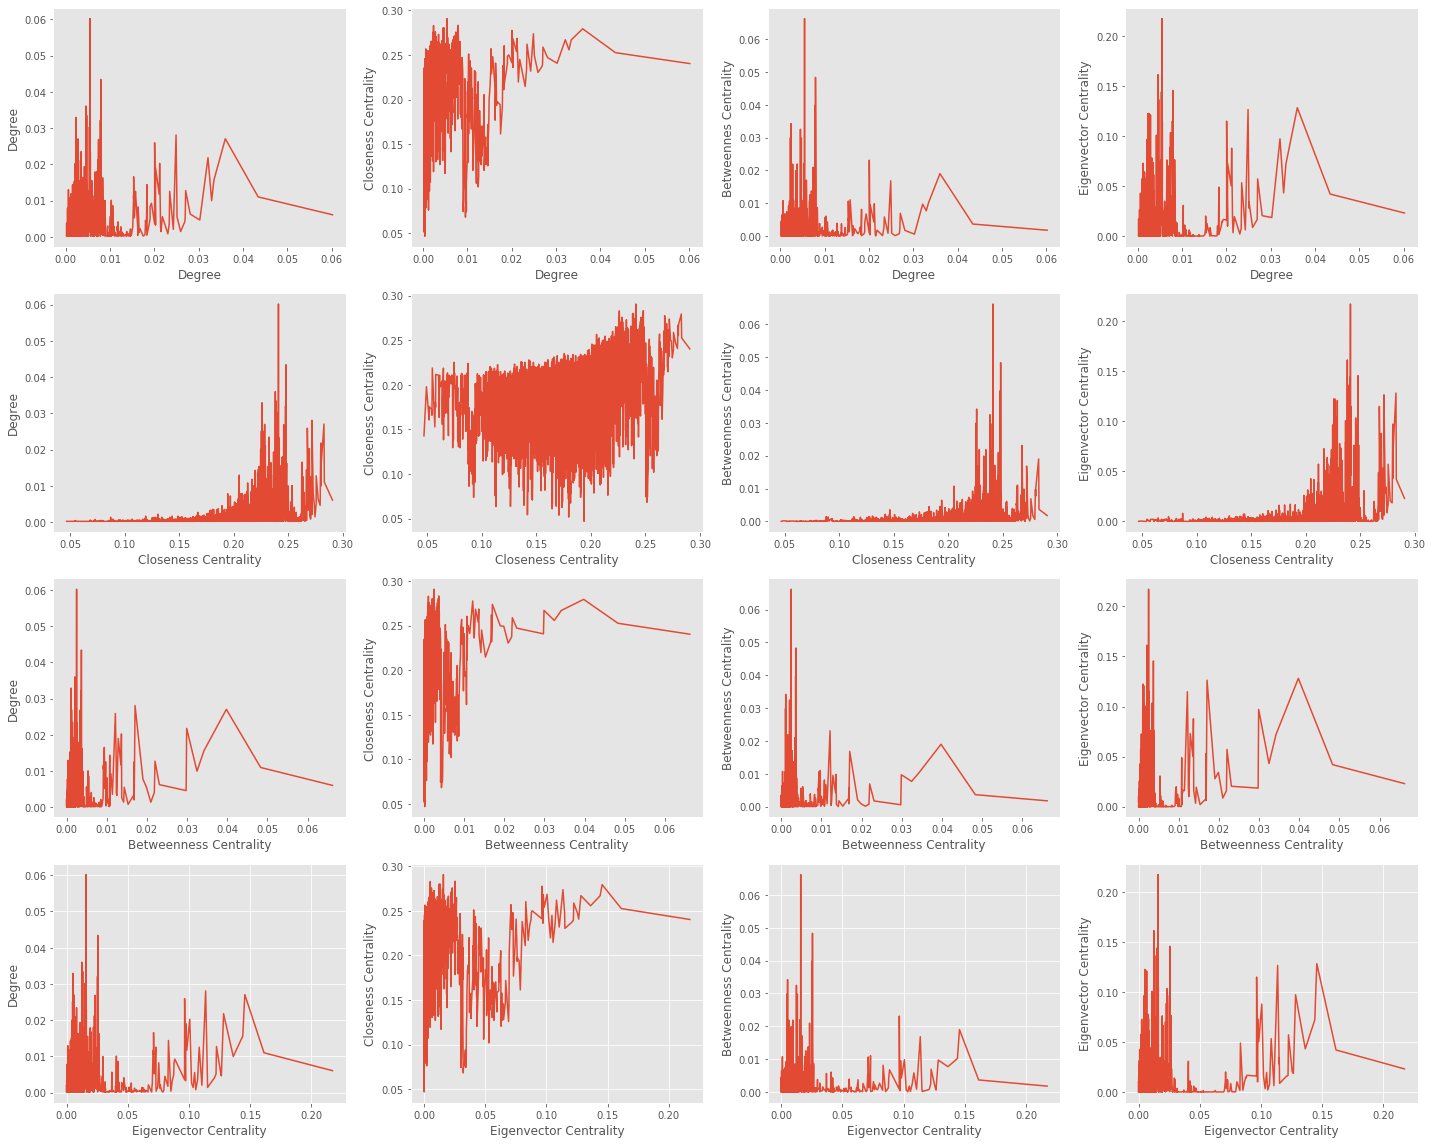

In [ ]:
fig, ax = plt.subplots(nrows=4,ncols=4,figsize=(20,16))

degree_sequence = sorted(degree_centrality, reverse=True)
closeness_sequence = sorted(closeness_centrality, reverse=True)
betweeness_sequence = sorted(betweeness_centrality, reverse=True)
eigenvector_sequence = sorted(eigenvector_centrality, reverse=True)

ax[0][0].plot(degree_sequence,degree_centrality)
ax[0][0].set_xlabel("Degree")
ax[0][0].set_ylabel("Degree")
ax[0][0].grid(False)

ax[0][1].plot(degree_sequence,closeness_centrality)
ax[0][1].set_xlabel("Degree")
ax[0][1].set_ylabel("Closeness Centrality")
ax[0][1].grid(False)

ax[0][2].plot(degree_sequence,betweeness_centrality)
ax[0][2].set_xlabel("Degree")
ax[0][2].set_ylabel("Betweennes Centrality")
ax[0][2].grid(False)

ax[0][3].plot(degree_sequence,eigenvector_centrality)
ax[0][3].set_xlabel("Degree")
ax[0][3].set_ylabel("Eigenvector Centrality")
ax[0][3].grid(False)

ax[1][0].plot(closeness_sequence,degree_centrality)
ax[1][0].set_xlabel("Closeness Centrality")
ax[1][0].set_ylabel("Degree")
ax[1][0].grid(False)

ax[1][1].plot(closeness_sequence,closeness_centrality)
ax[1][1].set_xlabel("Closeness Centrality")
ax[1][1].set_ylabel("Closeness Centrality")
ax[1][1].grid(False)

ax[1][2].plot(closeness_sequence,betweeness_centrality)
ax[1][2].set_xlabel("Closeness Centrality")
ax[1][2].set_ylabel("Betweenness Centrality")
ax[1][2].grid(False)

ax[1][3].plot(closeness_sequence,eigenvector_centrality)
ax[1][3].set_xlabel("Closeness Centrality")
ax[1][3].set_ylabel("Eigenvector Centrality")
ax[1][3].grid(False)

ax[2][0].plot(betweeness_sequence,degree_centrality)
ax[2][0].set_xlabel("Betweenness Centrality")
ax[2][0].set_ylabel("Degree")
ax[2][0].grid(False)

ax[2][1].plot(betweeness_sequence,closeness_centrality)
ax[2][1].set_xlabel("Betweenness Centrality")
ax[2][1].set_ylabel("Closeness Centrality")
ax[2][1].grid(False)

ax[2][2].plot(betweeness_sequence,betweeness_centrality)
ax[2][2].set_xlabel("Betweenness Centrality")
ax[2][2].set_ylabel("Betweenness Centrality")
ax[2][2].grid(False)

ax[2][3].plot(betweeness_sequence,eigenvector_centrality)
ax[2][3].set_xlabel("Betweenness Centrality")
ax[2][3].set_ylabel("Eigenvector Centrality")
ax[2][3].grid(False)

ax[3][0].plot(eigenvector_sequence,degree_centrality)
ax[3][0].set_xlabel("Eigenvector Centrality")
ax[3][0].set_ylabel("Degree")

ax[3][1].plot(eigenvector_sequence,closeness_centrality)
ax[3][1].set_xlabel("Eigenvector Centrality")
ax[3][1].set_ylabel("Closeness Centrality")

ax[3][2].plot(eigenvector_sequence,betweeness_centrality)
ax[3][2].set_xlabel("Eigenvector Centrality")
ax[3][2].set_ylabel("Betweenness Centrality")

ax[3][3].plot(eigenvector_sequence,eigenvector_centrality)
ax[3][3].set_xlabel("Eigenvector Centrality")
ax[3][3].set_ylabel("Eigenvector Centrality")

fig.tight_layout()
plt.tight_layout()
plt.savefig('multivariate.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

# Network Decomposition - Analysis Deeper 2k-cores



For this part you have to remove self loops edges because otherwise the k-core decomposition will be committed.

In [ ]:
G.remove_edges_from(nx.selfloop_edges(G)) # remove self loops edges
print(set([v for k,v in nx.core_number(G).items()])) # all cores on graph
print(set([v for k,v in nx.core_number(G).items()])) # all shells on graph

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38}
{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38}


Print all nodes on 2-core decompositon graph

In [ ]:
# 2-core
core = 2
for i in nx.k_core(G,core):
  print(i)

# 1-shell
shell = 1
for i in nx.k_shell(G,shell):
  print(i)

Nodes on the maximum k-core and k-shell founded on graph, respectively.

In [ ]:
# the max core of the graph
list(nx.k_core(G,38)) # k-core

In [ ]:
# the max shell of the graph
list(nx.k_shell(G,37)) # k-shell

Length of list with all nodes founded on 2-core graph decomposition

In [ ]:
len([G.degree(node) for node in list(nx.k_core(G,2))]) # 2-core

9722

Length of list with all nodes founded on 1-shell graph decomposition

In [ ]:
len([G.degree(node) for node in list(nx.k_shell(G,1))]) # 1-shell

0

Plot the figure with de k-core (and k-shell) founded on graph.

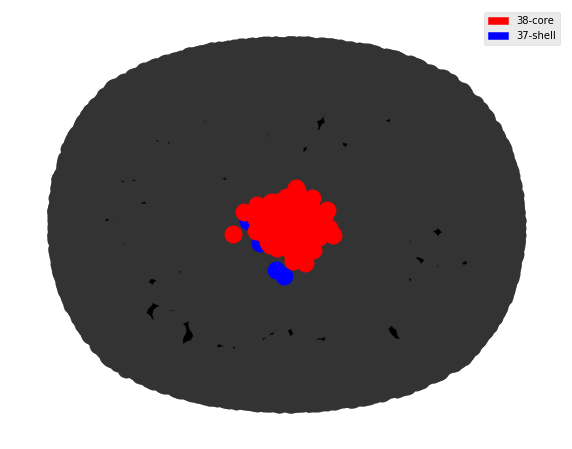

In [ ]:
# the degree of network
fig, ax = plt.subplots(1,1,figsize=(10,8))

# find k-cores
G_core_37 = nx.k_shell(G, 37)
G_core_38 = nx.k_core(G, 38)


# layout position
pos = nx.spring_layout(G,seed=123456789,k=0.3)

# draw edges
nx.draw_networkx_edges(G,
                       pos=pos,
                       alpha=0.4, ax=ax)

# draw nodes - original graph
nodes = nx.draw_networkx_nodes(G,
                 pos=pos,
                 node_color="#333333")

# draw nodes - k-core nodes
nodes = nx.draw_networkx_nodes(G_core_37,
                 pos=pos,
                 node_color="blue")

# draw nodes - k-shell nodes
nodes = nx.draw_networkx_nodes(G_core_38,
                 pos=pos,
                 node_color="red")

# static legend
red_patch = mpatches.Patch(color='red', label='38-core')
blue_patch = mpatches.Patch(color='blue', label='37-shell')
plt.legend(handles=[red_patch,blue_patch])

plt.axis("off")
plt.savefig('k-core_sociopatterns.png', transparent=True,dpi=600)
plt.show()

# Network Deployment Using Gephi

> What this network represents?

This network represents the connectivity between all playlists of Spotify on the used dataset, this connectivity its made with the music artists on those playlists. 

We have 51 groups on this network and each group has, a least, three members; you can easily see some group with Pop or R&B artists, other with Rock artists and a lot more.  

> Ok but how was made? What was the metrics behind this network? 

It was made considering five metrics we studied while working on this project: 
1. Clusters;
2. Cluster coefficient;
3. Degree;
4. Input Degree; 
5. Output Degree. 





**See and [interact](https://paulovanzo.github.io/networks/network/) with the network!**

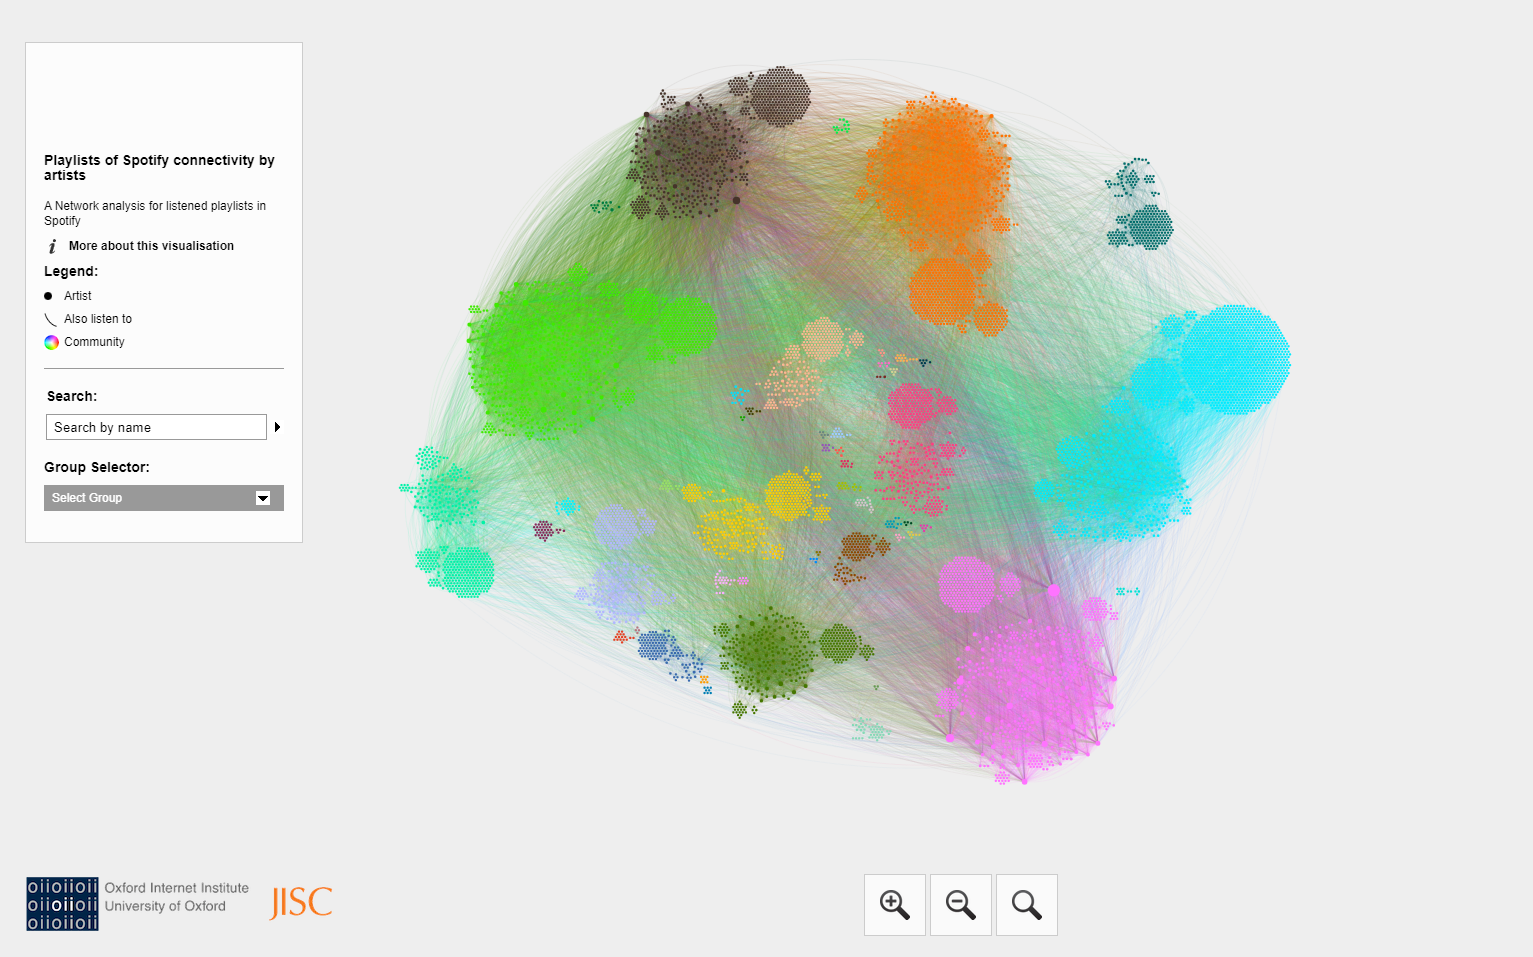